# KJ Applied Predictive Modeling 

# Regression Trees and Rule-Based Models

In [15]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

## Exercise 8.1

Recreate the simulated data from Exercise 7.2:

> library(mlbench)
>
> set.seed(200)
>
> simulated <- mlbench.friedman1(200, sd = 1)
>
> simulated <- cbind(simulated\$x, simulated\$y)
>
> simulated <- as.data.frame(simulated)
>
> colnames(simulated)[ncol(simulated)] <- "y"

In [16]:
simulated = pd.read_csv('c:/Users/nickc/DataScience/NickAMC.github.io/DATA_624_S24/hw9/simulated.csv').drop('Unnamed: 0', axis = 1)

In [17]:
X = simulated.drop('y', axis = 1)
y = simulated[['y']]
X.shape, y.shape

((200, 10), (200, 1))

### Part A 

#### Did the random forest model significantly use the uninformative predictors (V6 – V10)?

In [18]:
#| message : false
#| warning : false
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=1000, random_state=1998)

rf.fit(X,y)

feature_importances = pd.DataFrame(
    {'feature': X.columns, 'importance': rf.feature_importances_}
)

print(feature_importances.sort_values(by='importance',ascending=False)) 

c:\Users\nickc\DataScience\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


  feature  importance
0      V1    0.297278
3      V4    0.260237
1      V2    0.232932
4      V5    0.082086
2      V3    0.036849
5      V6    0.023129
6      V7    0.021162
9     V10    0.019674
7      V8    0.013849
8      V9    0.012803


This random forest model identified that V6-V10 were the least informative features and at most weighted it a value of 0.02. On the other hand, V1,V4 and V2 were the most informative.

### Part B 

#### Now add an additional predictor that is highly correlated with one of the informative predictors. 

#### For example:

> simulated\$duplicate1 <- simulated\$V1 + rnorm(200) * .1
>
> cor(simulated\$duplicate1, simulated\$V1)
>


In [19]:
simulated['V1_updated'] = simulated['V1'] + np.random.rand(200) * 0.1

X = simulated.drop('y', axis = 1)
y = simulated[['y']]

In [20]:
simulated[['V1_updated', 'V1']].corr()

,V1_updated,V1
V1_updated,1.00000,0.99461
V1,0.99461,1.00000


#### Fit another random forest model to these data. Did the importance score for V1 change? What happens when you add another predictor that is also highly correlated with V1?

In [21]:
#| message : false
#| warning : false
X = simulated.drop('y', axis = 1)
y = simulated[['y']]

rf2 = RandomForestRegressor(n_estimators= 1000, random_state=1998)

rf2.fit(X,y)

feature_importances = pd.DataFrame(
    {'feature': X.columns, 'importance': rf2.feature_importances_}
)

print(feature_importances.sort_values(by='importance',ascending=False)) 

c:\Users\nickc\DataScience\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


       feature  importance
3           V4    0.259969
1           V2    0.224981
0           V1    0.165627
10  V1_updated    0.143029
4           V5    0.080966
2           V3    0.036694
5           V6    0.023296
6           V7    0.021303
9          V10    0.019003
7           V8    0.012997
8           V9    0.012136


The importance score for V1 decreases from 0.29 to 0.18. this indicates the affect of multicollinearity where the model cant isolated the effect of individual features.

### Part C 

#### Use the cforest function in the party package to fit a random forest model using conditional inference trees. The party package function varimp can calculate predictor importance. The conditional argument of that function toggles between the traditional importance measure and the modified version described in Strobl et al. (2007). Do these importances show the same pattern as the traditional random forest model?

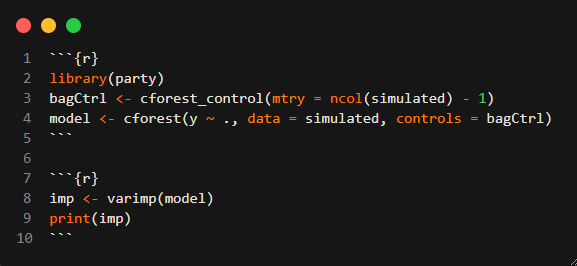

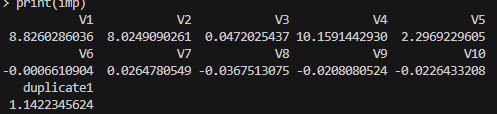

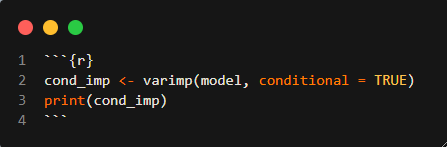

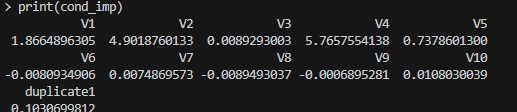

The features importance value for the conditional random forest have a similar pattern to the tradition randomforest models because V1-V5 as the most informative and while V6-V10 are the least informative features. After adding the highly correlated variable, it suggests signficant effect since it dropped V1 from the most informatve to the third most informatve feature.

### Part D

#### Repeat this process with different tree models, such as boosted trees and Cubist. Does the same pattern occur?


In [22]:
# Bagging decision trees model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

dt = DecisionTreeRegressor(random_state=1998)

dt.fit(X,y)
br = BaggingRegressor(estimator=dt, n_estimators=1000,random_state=1998)

br.fit(X,y)

importances = [dt.feature_importances_ for estimator in br.estimators_]
average_importances = np.mean(importances, axis=0) 
feature_importances_df = pd.DataFrame({'feature': X.columns, 'importance': average_importances})
feature_importances_df.sort_values(by='importance', ascending=False)


c:\Users\nickc\DataScience\.venv\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


,feature,importance
10,V1_updated,0.275596
3,V4,0.248447
1,V2,0.240733
4,V5,0.069642
0,V1,0.048848
9,V10,0.039886
5,V6,0.023386
6,V7,0.021123
2,V3,0.015977
8,V9,0.009019


In [23]:
# AdaBoost with DT as the base estimator 
from sklearn.ensemble import AdaBoostRegressor
dt2 = DecisionTreeRegressor(max_depth=4, random_state=1998)
dt2.fit(X,y)
ada = AdaBoostRegressor(estimator=dt2, n_estimators=1000, random_state=1998)
ada.fit(X,y)

importances = [dt2.feature_importances_ for estimator in ada.estimators_]
average_importances = np.mean(importances, axis=0) 
feature_importances_df = pd.DataFrame({'feature': X.columns, 'importance': average_importances})
feature_importances_df.sort_values(by='importance', ascending=False)

c:\Users\nickc\DataScience\.venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,feature,importance
10,V1_updated,0.349834
1,V2,0.273790
3,V4,0.266334
4,V5,0.045145
0,V1,0.032161
9,V10,0.025197
5,V6,0.007539
2,V3,0.000000
6,V7,0.000000
7,V8,0.000000


The Bagged and Boosted Trees does follow a similar patten but differ in the sense these models identified V1_updated to the most informative feature and significantly reduce the importance of V1. This indicates that V1_updated might prvide more information that were not present in V1.

___

## Exercise 8.2

#### Use a simulation to show tree bias with different granularities.

In [24]:
from sklearn.model_selection import train_test_split

n_samples = 500
V1 = np.random.randn(n_samples) * 10 
V2 = V1 / 10
V3 = V2 / 100

y = V1 + V2 + V3 + np.random.randn(n_samples) 

data = pd.DataFrame({'V1': V1, 'V2': V2, 'V3': V3, 'y': y})


In [25]:

X = data.drop('y', axis=1)
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1998)

dt = DecisionTreeRegressor(max_depth = 3,random_state=1998)

dt.fit(X_train, y_train)

feature_importances_df = pd.DataFrame({'feature': X_train.columns, 'importance': dt.feature_importances_})
feature_importances_df.sort_values(by='importance', ascending=False)




,feature,importance
2,V3,0.663708
0,V1,0.312036
1,V2,0.024256


[Text(0.5, 0.875, 'x[2] <= -0.001\nsquared_error = 120.081\nsamples = 400\nvalue = 0.412'),
 Text(0.25, 0.625, 'x[0] <= -9.494\nsquared_error = 34.673\nsamples = 181\nvalue = -9.216'),
 Text(0.125, 0.375, 'x[0] <= -14.85\nsquared_error = 20.878\nsamples = 63\nvalue = -15.592'),
 Text(0.0625, 0.125, 'squared_error = 18.199\nsamples = 22\nvalue = -20.394'),
 Text(0.1875, 0.125, 'squared_error = 3.306\nsamples = 41\nvalue = -13.016'),
 Text(0.375, 0.375, 'x[0] <= -5.23\nsquared_error = 8.743\nsamples = 118\nvalue = -5.812'),
 Text(0.3125, 0.125, 'squared_error = 2.777\nsamples = 61\nvalue = -8.2'),
 Text(0.4375, 0.125, 'squared_error = 2.498\nsamples = 57\nvalue = -3.257'),
 Text(0.75, 0.625, 'x[0] <= 9.919\nsquared_error = 50.718\nsamples = 219\nvalue = 8.37'),
 Text(0.625, 0.375, 'x[0] <= 5.135\nsquared_error = 10.544\nsamples = 150\nvalue = 4.312'),
 Text(0.5625, 0.125, 'squared_error = 2.999\nsamples = 92\nvalue = 2.122'),
 Text(0.6875, 0.125, 'squared_error = 2.827\nsamples = 58\nval

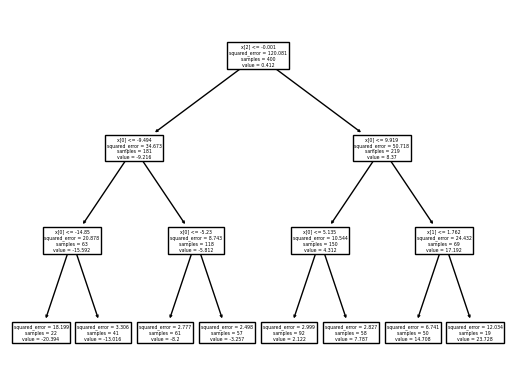

In [26]:
#| message : false
#| warning : false
from sklearn.tree import plot_tree

plot_tree(dt, max_depth =3)

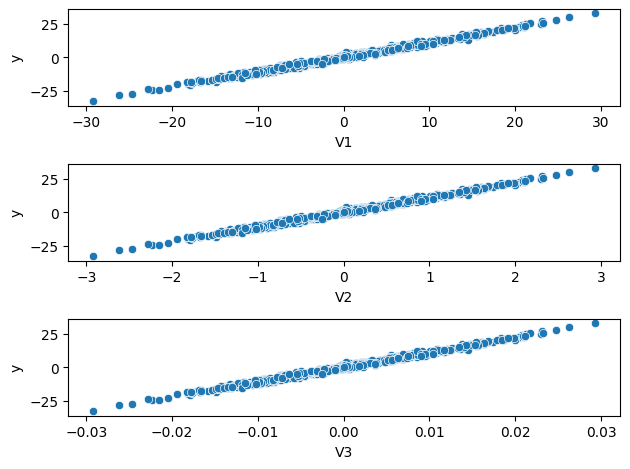

In [27]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1)
sns.scatterplot(x = 'V1', y = 'y', data=data, ax = ax1)
sns.scatterplot(x = 'V2', y = 'y', data=data, ax=ax2)
sns.scatterplot(x = 'V3', y = 'y', data=data, ax=ax3)
plt.tight_layout()
plt.show()

___

## Exercise 8.3 

#### In stochastic gradient boosting the bagging fraction and learning rate will govern the construction of the trees as they are guided by the gradient. 

#### Although the optimal values of these parameters should be obtained through the tuning process, it is helpful to understand how the magnitudes of these parameters affect magnitudes of variable importance. 

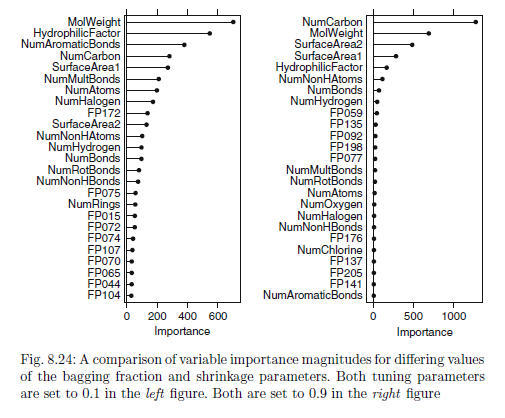

#### Figure 8.24 provides the variable importance plots for boosting using two extreme values for the bagging fraction (0.1 and 0.9) and the learning rate (0.1 and 0.9) for the solubility data. The left-hand plot has both parameters set to 0.1, and the right-hand plot has both set to 0.9:

### Part A 

#### Why does the model on the right focus its importance on just the first few of predictors, whereas the model on the left spreads importance across more predictors?


As the bagging fraction and learning rate approaches 1, the model more complex and thus becomes able to identify the more informative features related to the target variable. Especially as the baggin fraction allows more data to used for each stage in the boosting process. 

### Part B 

#### Which model do you think would be more predictive of other samples?


The model with bagging fraction and learning rate set to 0.9 results in depending on only a few features and runs the risk of overfitting the data with extreme values of the paraments. For the prior model, although its values are on the other extreme which in this case is 0.1. The left model depends on more predictors than the right which leads the model to being more robust since it does weight most of its explanatory powers on 1-2 features.


### Part C  

#### How would increasing interaction depth affect the slope of predictor importance for either model in Fig. 8.24?

As interaction depth increases, the model  can capture the more complex relations between features which would lead for the feature importnace to be more spread over the features. This runs the risk of overfitting the data where a less important feature might gain importance as the model tries to capture the noise.

___

## Exercise 8.7

#### Refer to Exercises 6.3 and 7.5 which describe a chemical manufacturing process. Use the same data imputation, data splitting, and pre-processing steps as before and train several tree-based models:

### Part A 

#### Which tree-based regression model gives the optimal resampling and testset performance?


In [34]:
# load the preprocessed data from hw 7
chem_man = pd.read_csv('c:/Users/nickc/DataScience/NickAMC.github.io/DATA_624_S24/hw7/chem_man_pp_data.csv')
chem_man.head()

,BiologicalMaterial01,BiologicalMaterial02,BiologicalMaterial03,BiologicalMaterial04,BiologicalMaterial05,BiologicalMaterial06,BiologicalMaterial08,BiologicalMaterial10,BiologicalMaterial11,BiologicalMaterial12,...,ManufacturingProcess30,ManufacturingProcess31,ManufacturingProcess32,ManufacturingProcess33,ManufacturingProcess35,ManufacturingProcess38,ManufacturingProcess39,ManufacturingProcess42,ManufacturingProcess43,Yield
0,-0.226749,-1.518418,-2.690691,0.220805,0.495604,-1.386833,-1.236650,1.103670,-1.843901,-1.775975,...,0.771707,-0.201836,-0.458186,1.000541,-0.900831,0.719520,0.232388,0.203374,2.412511,38.00
1,2.245538,1.312731,-0.056395,1.300137,0.414033,1.132298,2.289132,1.103670,1.397370,1.102121,...,0.771707,-0.275080,1.957322,1.000541,1.167981,-0.824815,0.232388,-0.054879,-0.013786,42.44
2,2.245538,1.312731,-0.056395,1.300137,0.414033,1.132298,2.289132,1.103670,1.397370,1.102121,...,0.250524,-0.165215,2.700555,1.000541,1.262018,-0.824815,0.232388,0.409977,0.101752,42.03
3,2.245538,1.312731,-0.056395,1.300137,0.414033,1.132298,2.289132,1.103670,1.397370,1.102121,...,0.250524,-0.165215,2.328938,1.819589,0.039538,-0.824815,0.232388,-0.313132,0.217290,41.42
4,1.486996,1.899343,1.139189,0.944127,-0.374484,1.539214,1.074367,0.417407,0.136645,1.102121,...,-0.166423,-0.146904,2.328938,2.638637,-2.593495,-0.824815,0.299001,-0.106529,0.217290,42.49


In [44]:
chem_man.shape

(176, 48)

In [38]:
X = chem_man.drop('Yield', axis =1)
y = chem_man[['Yield']].values.ravel()

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# split seed from hw7 was 1234
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234, shuffle = True)

model1 = DecisionTreeRegressor(random_state=1998)
model2 = RandomForestRegressor(random_state=1998)
model3 = GradientBoostingRegressor(random_state=1998)


model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

cv_scores_model1 = cross_val_score(model1, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_model2 = cross_val_score(model2, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_model3 = cross_val_score(model3, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# dont forget to add the negative sign
mean_cv_score_model1 = -cv_scores_model1.mean()
mean_cv_score_model2 = -cv_scores_model2.mean()
mean_cv_score_model3 = -cv_scores_model3.mean()

y_pred_model1 = model1.predict(X_test)
y_pred_model2 = model2.predict(X_test)
y_pred_model3 = model3.predict(X_test)

print("Resampling performance:")
print(f"Model DT: RMSE = {mean_cv_score_model1}")
print(f"Model RF: RMSE = {mean_cv_score_model2}")
print(f"Model GBR: RMSE = {mean_cv_score_model3}")
print("")

print("Test set performance:")
print(f"Model DT: RMSE = { mean_squared_error(y_test, y_pred_model1) ** 0.5}")
print(f"Model RF: RMSE ={ mean_squared_error(y_test, y_pred_model2) ** 0.5}")
print(f"Model GBR: RMSE ={ mean_squared_error(y_test, y_pred_model3) ** 0.5}")


Resampling performance:
Model DT: RMSE = 2.2582635714285724
Model RF: RMSE = 1.2148655536428556
Model GBR: RMSE = 1.2598661628488834

Test set performance:
Model DT: RMSE = 1.840452088180752
Model RF: RMSE =1.481248670697954
Model GBR: RMSE =1.4591742169849724



### Part B  

#### Which predictors are most important in the optimal tree-based regressionmodel? Do either the biological or process variables dominate the list? How do the top 10 important predictors compare to the top 10 predictors from the optimal linear and nonlinear models?


In [46]:
feature_importances_df = pd.DataFrame({'feature': X.columns, 'importance': model3.feature_importances_})
feature_importances_df.sort_values(by='importance', ascending=False).head(10)

,feature,importance
40,ManufacturingProcess32,0.496453
9,BiologicalMaterial12,0.047714
33,ManufacturingProcess25,0.032051
2,BiologicalMaterial03,0.031798
17,ManufacturingProcess09,0.029282
4,BiologicalMaterial05,0.028059
14,ManufacturingProcess06,0.025452
25,ManufacturingProcess17,0.024980
1,BiologicalMaterial02,0.021369
39,ManufacturingProcess31,0.020247



### Part C 

#### Plot the optimal single tree with the distribution of yield in the terminal nodes. Does this view of the data provide additional knowledge about the biological or process predictors and their relationship with yield?

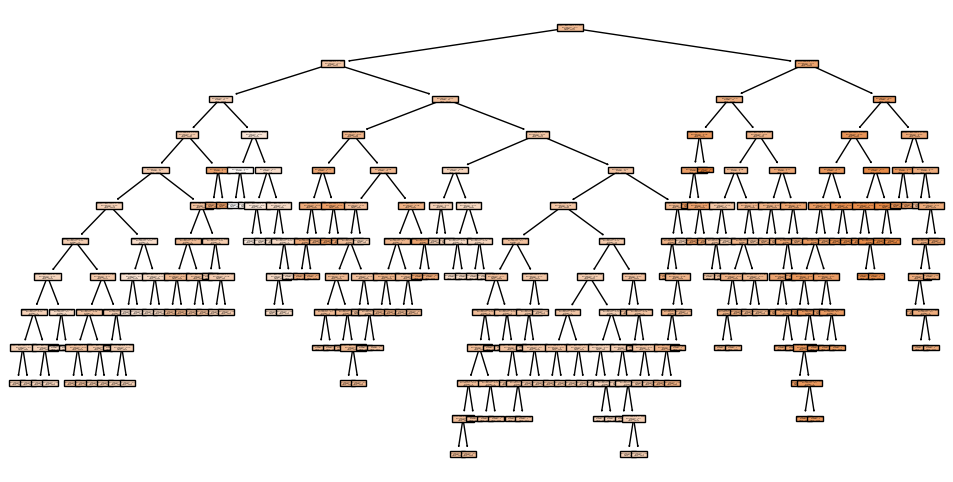

In [47]:
plt.figure(figsize=(12, 6))
plot_tree(model1, filled=True, feature_names=X_train.columns)
plt.show()


___